# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Loading Dataset

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Project DataSet/train_data.csv')
data.head(3)

MMM-YY  Emp_ID  Age Gender City Education_Level  Salary Dateofjoining  \
0  2016-01-01       1   28   Male  C23          Master   57387    2015-12-24   
1  2016-02-01       1   28   Male  C23          Master   57387    2015-12-24   
2  2016-03-01       1   28   Male  C23          Master   57387    2015-12-24   

  LastWorkingDate  Joining Designation  Designation  Total Business Value  \
0             NaN                    1            1               2381060   
1             NaN                    1            1               -665480   
2      2016-03-11                    1            1                     0   

   Quarterly Rating  
0                 2  
1                 2  
2                 2

# Analyse Data Set With EDA

Checking Data Types and Other Statistical Oparations

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [4]:
data.describe()

Emp_ID           Age         Salary  Joining Designation  \
count  19104.000000  19104.000000   19104.000000         19104.000000   
mean    1415.591133     34.650283   65652.025126             1.690536   
std      810.705321      6.264471   30914.515344             0.836984   
min        1.000000     21.000000   10747.000000             1.000000   
25%      710.000000     30.000000   42383.000000             1.000000   
50%     1417.000000     34.000000   60087.000000             1.000000   
75%     2137.000000     39.000000   83969.000000             2.000000   
max     2788.000000     58.000000  188418.000000             5.000000   

        Designation  Total Business Value  Quarterly Rating  
count  19104.000000          1.910400e+04      19104.000000  
mean       2.252670          5.716621e+05          2.008899  
std        1.026512          1.128312e+06          1.009832  
min        1.000000         -6.000000e+06          1.000000  
25%        1.000000          0.000000e+00          1.000000  
50%        2.000000          2.500000e+05          2.000000  
75%        3.000000          6.997000e+05          3.000000  
max        5.000000          3.374772e+07          4.000000

Checking Unique values

In [5]:
cols = data.columns
for i in cols:
  print(i,"Has:  ",data[i].nunique(), "Unique Values")

MMM-YY Has:   24 Unique Values
Emp_ID Has:   2381 Unique Values
Age Has:   36 Unique Values
Gender Has:   2 Unique Values
City Has:   29 Unique Values
Education_Level Has:   3 Unique Values
Salary Has:   2383 Unique Values
Dateofjoining Has:   869 Unique Values
LastWorkingDate Has:   493 Unique Values
Joining Designation Has:   5 Unique Values
Designation Has:   5 Unique Values
Total Business Value Has:   10181 Unique Values
Quarterly Rating Has:   4 Unique Values


Checking Null Values

In [6]:
data.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [7]:
df = data.copy()

In [8]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [9]:
# df['Year_of_join'] = df['Dateofjoining'].apply(lambda t:t.year)
# df['Month_of_join'] = df['Dateofjoining'].apply(lambda t:t.month)
# df['Day_of_join'] = df['Dateofjoining'].apply(lambda t:t.day)
# df['Year_of_leave'] = df['LastWorkingDate'].apply(lambda t:t.year)
# df['Month_of_leave'] = df['LastWorkingDate'].apply(lambda t:t.month)

# Creating Target Column

Creating dataset only with unique values

In [10]:
uni_emp= df[['Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'Joining Designation','Designation']].drop_duplicates()
uni_emp.nunique()

Emp_ID                 2381
Age                      36
Gender                    2
City                     29
Education_Level           3
Salary                 2383
Dateofjoining           869
Joining Designation       5
Designation               5
dtype: int64

Adding target column named Attrition with 0 in a diff dataset and Adding all the null value from LastWorkingDay column in a new column. Marging it with uni_emp filling all the null value with 1.

In [11]:
emp_left = df[df['LastWorkingDate'].isna()]
emp_left['Attrition'] = 0
uni_emp = uni_emp.merge(emp_left[['Emp_ID','Attrition']],on='Emp_ID',how='left')
uni_emp.head()
uni_emp['Attrition']= uni_emp['Attrition'].fillna(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


creating new dataset name empage adding count of city then joining with uni_emp

In [12]:
empage = df.groupby(['Emp_ID']).count()['City']
empage = empage.reset_index()
empage.columns = ['Emp_ID','With_US']
empage.head()

Emp_ID  With_US
0       1        3
1       2        2
2       4        5
3       5        3
4       6        5

In [13]:
uni_emp = uni_emp.merge(empage,on='Emp_ID',how='left')
uni_emp.head()

Emp_ID  Age Gender City Education_Level  Salary Dateofjoining  \
0       1   28   Male  C23          Master   57387    2015-12-24   
1       1   28   Male  C23          Master   57387    2015-12-24   
2       2   31   Male   C7          Master   67016    2017-11-06   
3       2   31   Male   C7          Master   67016    2017-11-06   
4       4   43   Male  C13          Master   65603    2016-12-07   

   Joining Designation  Designation  Attrition  With_US  
0                    1            1        0.0        3  
1                    1            1        0.0        3  
2                    2            2        0.0        2  
3                    2            2        0.0        2  
4                    2            2        0.0        5

Getting the mean value of "Total Business Value","Quarterly Rating" Where Index Label column is Emp_ID from the main df dataset. then joing it with uni_emp table.

In [14]:
uni_emp = uni_emp.merge(pd.pivot_table(df,index='Emp_ID',values=['Total Business Value','Quarterly Rating']).reset_index(),on='Emp_ID',how='left')

In [15]:
# pd.pivot_table(df,index='Emp_ID',values=['Total Business Value','Quarterly Rating'],margins=True)
uni_emp.head()

Emp_ID  Age Gender City Education_Level  Salary Dateofjoining  \
0       1   28   Male  C23          Master   57387    2015-12-24   
1       1   28   Male  C23          Master   57387    2015-12-24   
2       2   31   Male   C7          Master   67016    2017-11-06   
3       2   31   Male   C7          Master   67016    2017-11-06   
4       4   43   Male  C13          Master   65603    2016-12-07   

   Joining Designation  Designation  Attrition  With_US  Quarterly Rating  \
0                    1            1        0.0        3               2.0   
1                    1            1        0.0        3               2.0   
2                    2            2        0.0        2               1.0   
3                    2            2        0.0        2               1.0   
4                    2            2        0.0        5               1.0   

   Total Business Value  
0              571860.0  
1              571860.0  
2                   0.0  
3                   0.0  
4               70000.0

Now Adding last rating columns with the value of Quarterly Rating by performing drop_duplicates function.


In [16]:
last_rating = df[['Emp_ID','Quarterly Rating']].drop_duplicates(subset='Emp_ID',keep= 'last')
last_rating.columns = ['Emp_ID','Last_Rating']
uni_emp = uni_emp.merge(last_rating,on= 'Emp_ID',how='left')
uni_emp.head()

Emp_ID  Age Gender City Education_Level  Salary Dateofjoining  \
0       1   28   Male  C23          Master   57387    2015-12-24   
1       1   28   Male  C23          Master   57387    2015-12-24   
2       2   31   Male   C7          Master   67016    2017-11-06   
3       2   31   Male   C7          Master   67016    2017-11-06   
4       4   43   Male  C13          Master   65603    2016-12-07   

   Joining Designation  Designation  Attrition  With_US  Quarterly Rating  \
0                    1            1        0.0        3               2.0   
1                    1            1        0.0        3               2.0   
2                    2            2        0.0        2               1.0   
3                    2            2        0.0        2               1.0   
4                    2            2        0.0        5               1.0   

   Total Business Value  Last_Rating  
0              571860.0            2  
1              571860.0            2  
2                   0.0            1  
3                   0.0            1  
4               70000.0            1

# Now Final Set is Created. It's time to clean the set and play with plot.


In [17]:
final = uni_emp.copy()

In [18]:
final.dtypes

Emp_ID                           int64
Age                              int64
Gender                          object
City                            object
Education_Level                 object
Salary                           int64
Dateofjoining           datetime64[ns]
Joining Designation              int64
Designation                      int64
Attrition                      float64
With_US                          int64
Quarterly Rating               float64
Total Business Value           float64
Last_Rating                      int64
dtype: object

In [19]:
final.isnull().sum()

Emp_ID                  0
Age                     0
Gender                  0
City                    0
Education_Level         0
Salary                  0
Dateofjoining           0
Joining Designation     0
Designation             0
Attrition               0
With_US                 0
Quarterly Rating        0
Total Business Value    0
Last_Rating             0
dtype: int64

In [20]:
final.dtypes

Emp_ID                           int64
Age                              int64
Gender                          object
City                            object
Education_Level                 object
Salary                           int64
Dateofjoining           datetime64[ns]
Joining Designation              int64
Designation                      int64
Attrition                      float64
With_US                          int64
Quarterly Rating               float64
Total Business Value           float64
Last_Rating                      int64
dtype: object

Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final['Gender'] = le.fit_transform(final['Gender'])
final['City'] = le.fit_transform(final['City'])
final['Education_Level'] = le.fit_transform(final['Education_Level'])

In [22]:
final.head()

Emp_ID  Age  Gender  City  Education_Level  Salary Dateofjoining  \
0       1   28       1    15                2   57387    2015-12-24   
1       1   28       1    15                2   57387    2015-12-24   
2       2   31       1    26                2   67016    2017-11-06   
3       2   31       1    26                2   67016    2017-11-06   
4       4   43       1     4                2   65603    2016-12-07   

   Joining Designation  Designation  Attrition  With_US  Quarterly Rating  \
0                    1            1        0.0        3               2.0   
1                    1            1        0.0        3               2.0   
2                    2            2        0.0        2               1.0   
3                    2            2        0.0        2               1.0   
4                    2            2        0.0        5               1.0   

   Total Business Value  Last_Rating  
0              571860.0            2  
1              571860.0            2  
2                   0.0            1  
3                   0.0            1  
4               70000.0            1

In [23]:
final['Dateofjoining'] = pd.to_datetime(final['Dateofjoining'])
final.dtypes

Emp_ID                           int64
Age                              int64
Gender                           int64
City                             int64
Education_Level                  int64
Salary                           int64
Dateofjoining           datetime64[ns]
Joining Designation              int64
Designation                      int64
Attrition                      float64
With_US                          int64
Quarterly Rating               float64
Total Business Value           float64
Last_Rating                      int64
dtype: object

In [24]:
# def cat_to_int(data):
#   df = data.columns
#   for i in df:
#     if data[i].dtypes == "datetime64[ns]":
#       print('d')
#       print(i)
#       data[i]= pd.to_numeric(data[i])
#   return data

#cat_to_int(final)

In [25]:
final['Year_of_join'] = final['Dateofjoining'].apply(lambda t:t.year)
final['Month_of_join'] = final['Dateofjoining'].apply(lambda t:t.month)
final['Day_of_join'] = final['Dateofjoining'].apply(lambda t:t.day)

final.drop(['Dateofjoining'],axis = 1, inplace =True)

In [26]:
final.columns


Index(['Emp_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Salary',
       'Joining Designation', 'Designation', 'Attrition', 'With_US',
       'Quarterly Rating', 'Total Business Value', 'Last_Rating',
       'Year_of_join', 'Month_of_join', 'Day_of_join'],
      dtype='object')

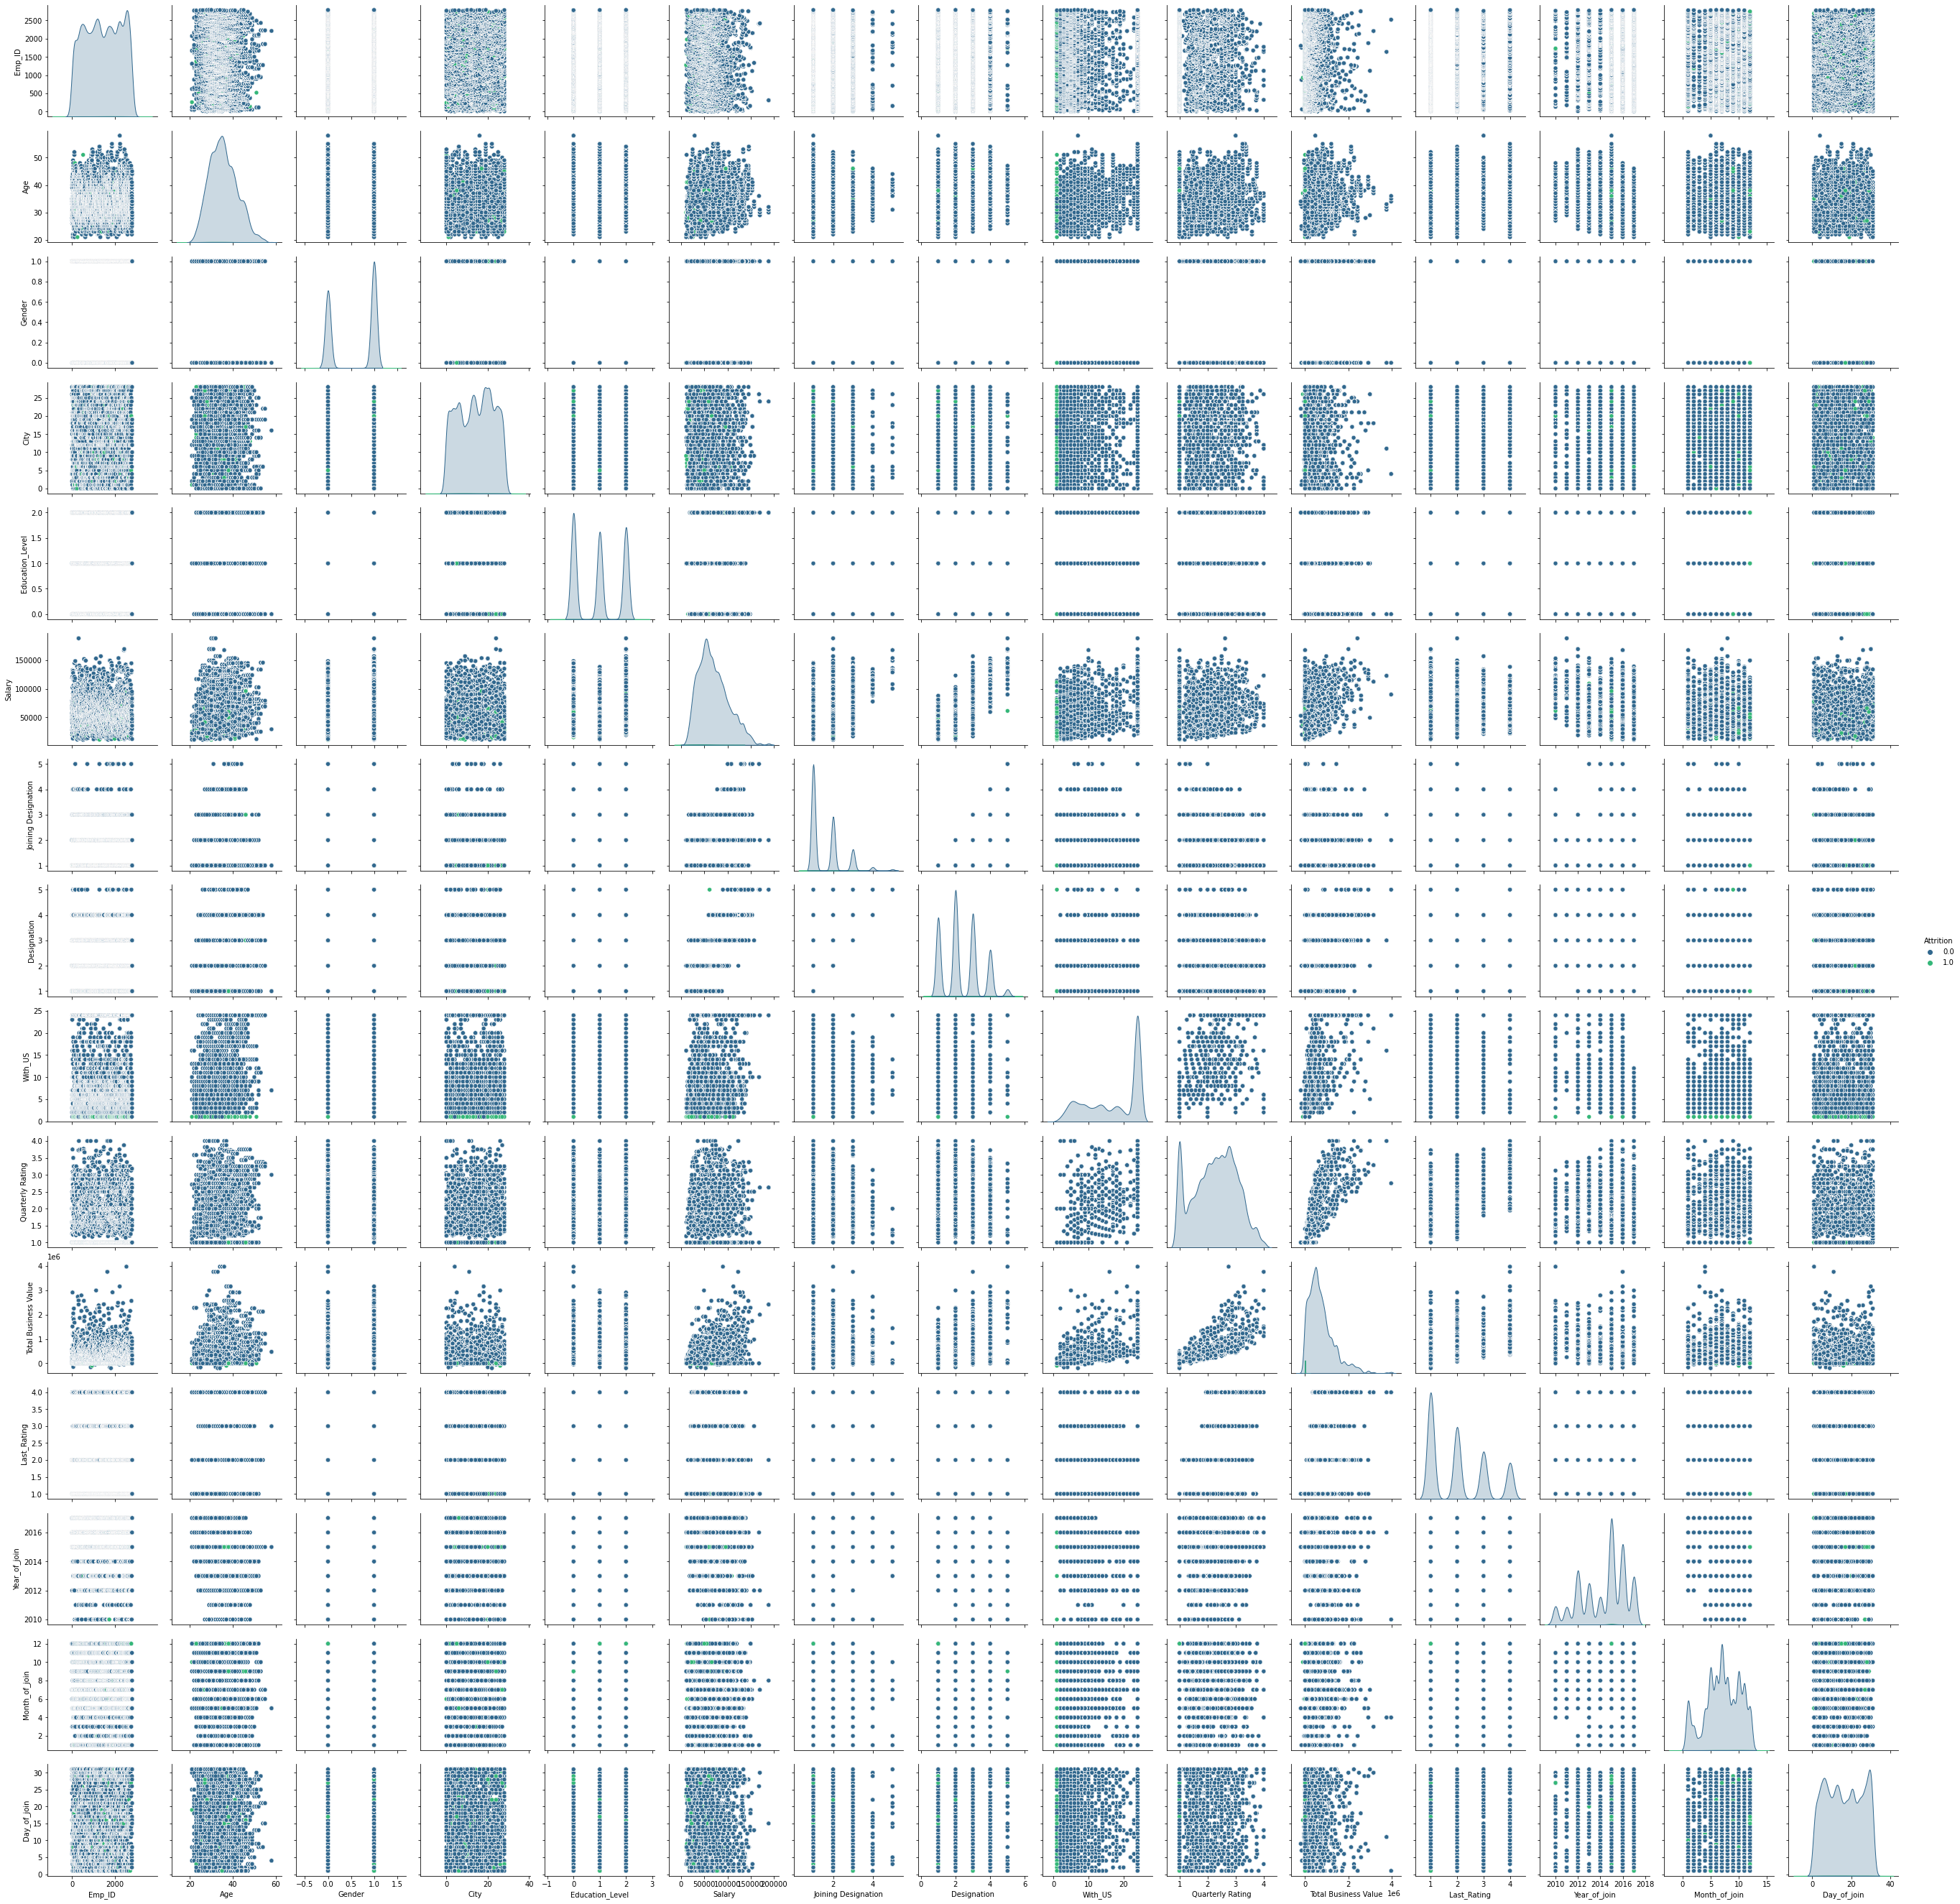

In [27]:
sns.pairplot(final[['Emp_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Salary',
       'Joining Designation', 'Designation', 'Attrition', 'With_US',
       'Quarterly Rating', 'Total Business Value', 'Last_Rating',
       'Year_of_join', 'Month_of_join', 'Day_of_join']], hue="Attrition", palette="viridis")


In [28]:
final.head()

Emp_ID  Age  Gender  City  Education_Level  Salary  Joining Designation  \
0       1   28       1    15                2   57387                    1   
1       1   28       1    15                2   57387                    1   
2       2   31       1    26                2   67016                    2   
3       2   31       1    26                2   67016                    2   
4       4   43       1     4                2   65603                    2   

   Designation  Attrition  With_US  Quarterly Rating  Total Business Value  \
0            1        0.0        3               2.0              571860.0   
1            1        0.0        3               2.0              571860.0   
2            2        0.0        2               1.0                   0.0   
3            2        0.0        2               1.0                   0.0   
4            2        0.0        5               1.0               70000.0   

   Last_Rating  Year_of_join  Month_of_join  Day_of_join  
0            2          2015             12           24  
1            2          2015             12           24  
2            1          2017             11            6  
3            1          2017             11            6  
4            1          2016             12            7

In [29]:
def boxplot(data):
  final_col = data.columns
  plt.figure(figsize=(16,16))
  for i in enumerate(final_col):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=i[1], hue='Attrition',data= data)
    

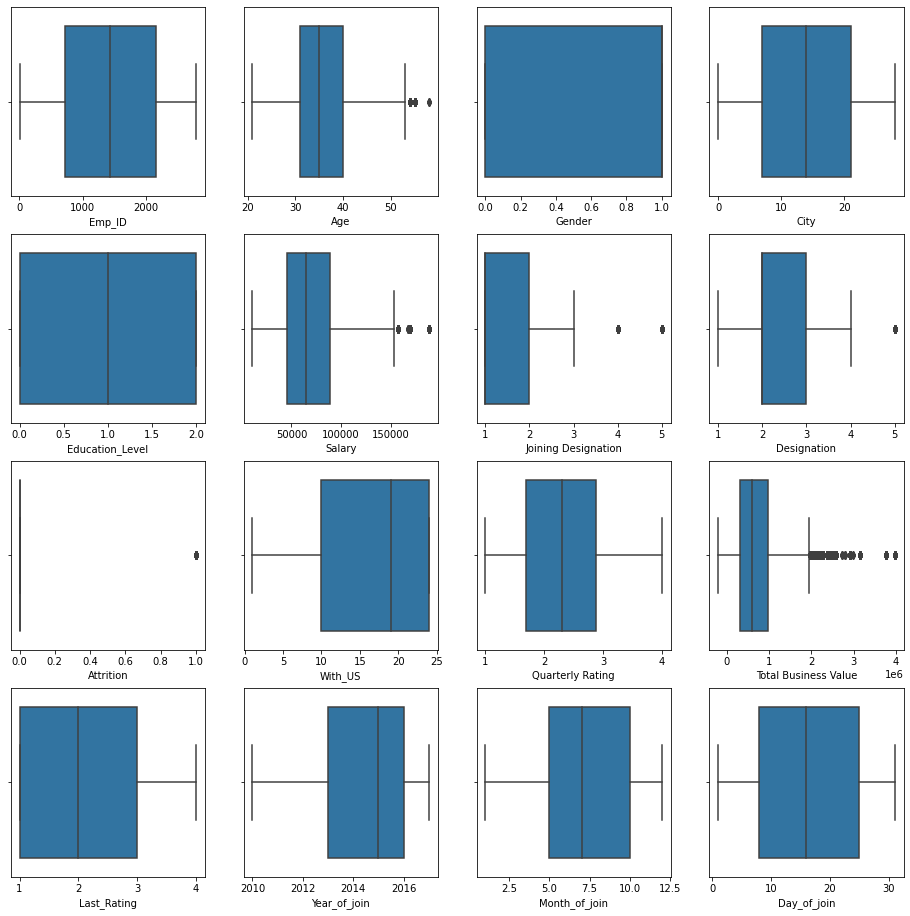

In [30]:
boxplot(final)

In [31]:
final['Age'].max()

58

In [32]:
final['Total Business Value'].max()

3972127.5

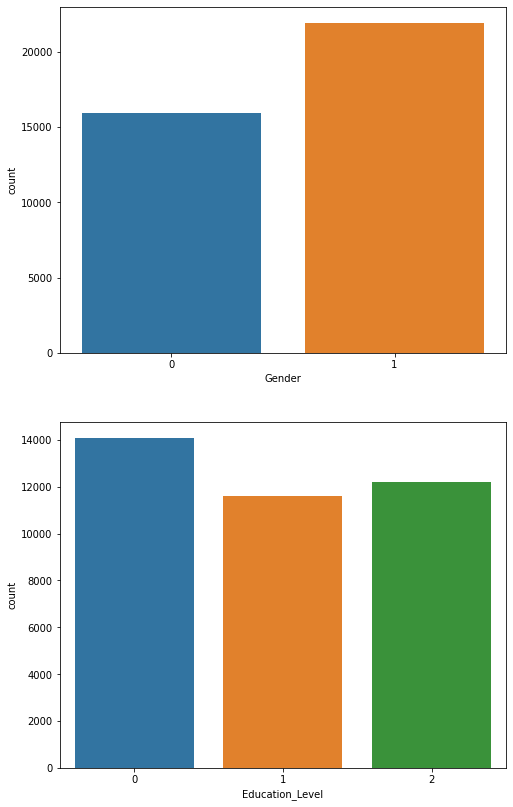

In [33]:
def count_plot(df, col_1, col_2):
  fig , axis = plt.subplots(nrows= 2, figsize= (8,14))
  sns.countplot(x = df[col_1],data = df, ax = axis[0])
  sns.countplot(x = df[col_2],data = df, ax = axis[1])

count_plot(final,'Gender','Education_Level')

In [34]:
# sns.countplot(x= 'Gender',y= 'Education_Level',hue='Attrition', data = final )

# Checking If dataset is balanced or not 

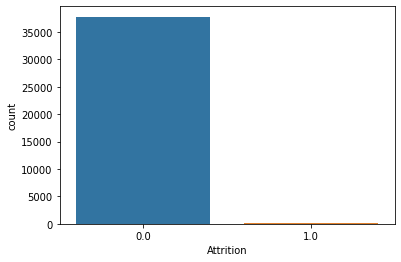

In [35]:
sns.countplot(x=final['Attrition'])

# Balancing Data

In [36]:
cols = final.columns

In [37]:
x= final.drop(['Attrition'],axis = 1)
y = final['Attrition']

In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
Ind, target = sm.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


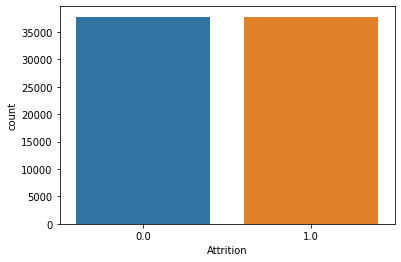

In [39]:
sns.countplot(target)

# Performing holdOut cross validation
which is nothing but splitting our dataset into train and test.

Using Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Ind,target, test_size= 0.20,random_state= 0)

LR = LogisticRegression(verbose=3)
LR.fit(x_train,y_train)
prediction = LR.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


In [59]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      7473
         1.0       0.97      0.99      0.98      7628

    accuracy                           0.98     15101
   macro avg       0.98      0.98      0.98     15101
weighted avg       0.98      0.98      0.98     15101



Using Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
result = model.score(x_test,y_test)
print("Accuracy by using Decision Tree Classifier:",round(result*100))

Accuracy by using Decision Tree Classifier: 100


Using K-Fold CV

In [67]:
from sklearn.model_selection import KFold, cross_val_score

model = DecisionTreeClassifier()
KF_val = KFold(10)

result = cross_val_score(model,Ind,target,cv=KF_val)

res = pd.DataFrame(result)
res.columns = ['Val_Accuracy']
res


Val_Accuracy
0      0.999868
1      1.000000
2      0.999868
3      0.999868
4      0.999868
5      1.000000
6      1.000000
7      1.000000
8      1.000000
9      1.000000

In [73]:
print("The Avg Accuracy By Using KFold:::",round(np.mean(result))*100)

The Avg Accuracy By Using KFold::: 100
